# T-SNE Plot for ReID Features
In this notebook we are going to analyze our ReID features and whether they are an acceptable represenation of our cropped boxes. Since we use a pretrained ResNet-50 that has not been trained on persons let's first get an intuition about the quality of the computed representations.

In [1]:
import pickle
import random

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  

### 1. Load ReID features and Extract Information

In [2]:
with open('/home/ge93qew/WILDTRACK/Image_subsets/C1/reid-features/saved_dictionary-C1.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
loaded_dict

{0: [array([0.05530612, 0.58880645, 0.3423338 , ..., 0.34081143, 0.22681619,
         0.36435097], dtype=float32),
  '0000',
  '0001',
  '00000000.png',
  'C1'],
 1: [array([0.10136584, 0.3758755 , 0.24440679, ..., 0.39724353, 0.35986918,
         0.4615858 ], dtype=float32),
  '0001',
  '0001',
  '00000000.png',
  'C1'],
 2: [array([0.20998527, 0.20233995, 0.30008477, ..., 0.4331035 , 0.25288337,
         0.23394808], dtype=float32),
  '0002',
  '0001',
  '00000000.png',
  'C1'],
 3: [array([0.15886776, 0.4303954 , 0.52507055, ..., 0.08716354, 0.0670777 ,
         0.09488679], dtype=float32),
  '0003',
  '0001',
  '00000000.png',
  'C1'],
 4: [array([0.18075477, 0.44619253, 0.3163491 , ..., 0.19573323, 0.1899327 ,
         0.18397342], dtype=float32),
  '0004',
  '0001',
  '00000000.png',
  'C1'],
 5: [array([0.12789458, 0.64156425, 0.28469804, ..., 0.37094203, 0.19496405,
         0.2298563 ], dtype=float32),
  '0005',
  '0001',
  '00000000.png',
  'C1'],
 6: [array([0.05638935, 0.67

Create variables containing the respective information.

In [3]:
re_id, person_ID, frame_ID, name, cam_ID = zip(*([loaded_dict[i][0], loaded_dict[i][1], 
                                                  loaded_dict[i][2], loaded_dict[i][3], 
                                                  loaded_dict[i][4]] for i in loaded_dict))

### T-SNE Dimensionality Reduction
For visualization purposes we only plot the t-SNE representation of ReID features corresponding to 7 pedestrians. 

In [4]:
random.seed(404)
n = 7
rand_labels = random.sample(person_ID, n)
rand_labels

['0116', '0063', '0024', '0281', '0168', '0616', '0472']

For all samples find the ReID features that correspond to the labels in `rand_labels`.

In [5]:
pedestrians = []
for i in range(len(loaded_dict)):
    if loaded_dict[i][1] in rand_labels:
        pedestrians.append([loaded_dict[i][0],loaded_dict[i][1]])
        
x = [pedestrians[i][0] for i in range(len(pedestrians))] # ReID features
y = [pedestrians[i][1] for i in range(len(pedestrians))] # Labels

Perform the dimensionality reduction using t-SNE.

In [6]:
tsnee = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
result = tsnee.fit_transform(x)

/home/ge93qew/PycharmProjects/Forschungspraxis/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ge93qew/PycharmProjects/Forschungspraxis/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 354 samples in 0.001s...
[t-SNE] Computed neighbors for 354 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 354 / 354
[t-SNE] Mean sigma: 2.836079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.694267
[t-SNE] KL divergence after 300 iterations: 0.788699


In [7]:
df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["comp-1"] = result[:,0]
df_tsne["comp-2"] = result[:,1]

Test if the number of unique person ids is indeed n = 7.

In [8]:
# Number of unique person_IDs
num_person_ID_unique = set(y)
print(len(num_person_ID_unique))

7


### 3. T-SNE Plot

[Text(0.5, 1.0, 'T-SNE Projection Re-ID Features')]

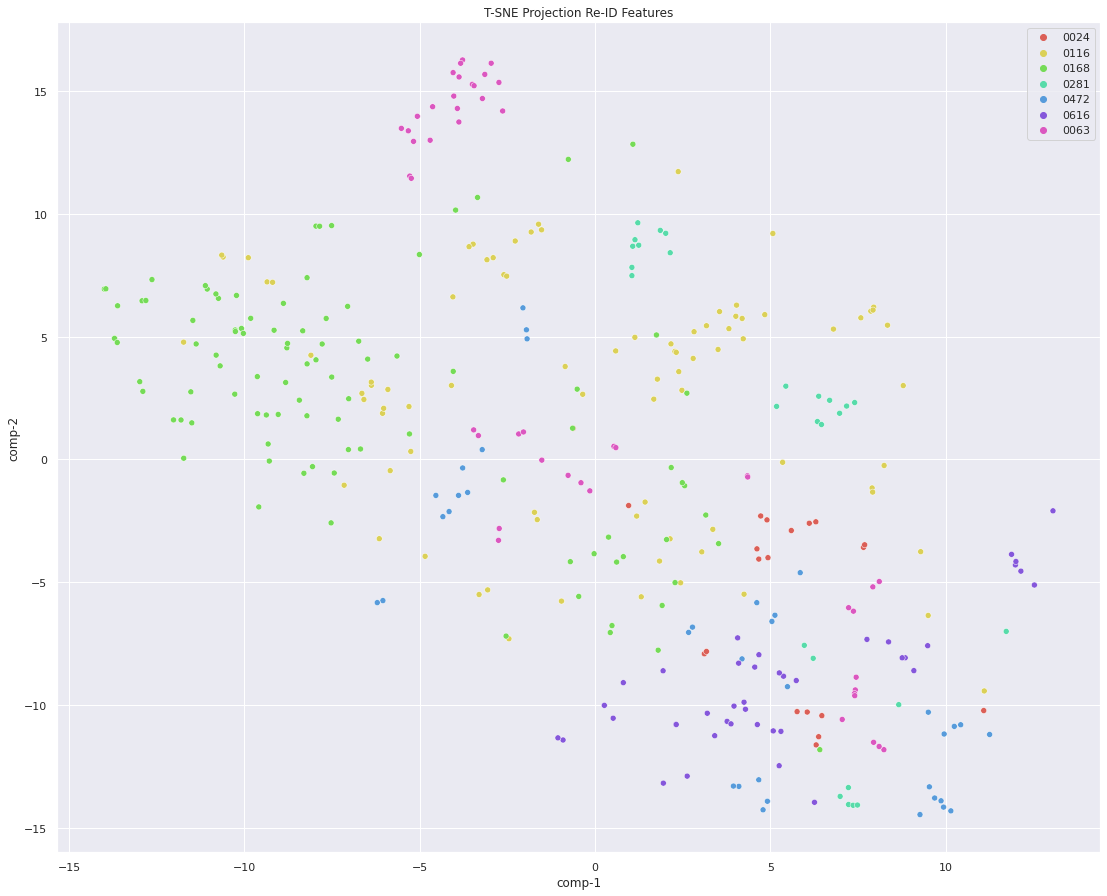

In [10]:
sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
                palette=sns.color_palette("hls", len(num_person_ID_unique)),
                data=df_tsne).set(title="T-SNE Projection Re-ID Features") 

This plot shows that our ReID features form at least small clusters for some person ids (see the magenta dots). Another observation is that green and yellow might have simillar appearances, e.g. a similaly colored jacket and cannot be distinguished properly. Even though these features are not the best choice we are going to use them as node features of the graph nodes. 